In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

In [3]:
path='/Users/nihaalnadaf/Downloads/equity/'
X = pd.read_csv(path + "calls_data.csv")
y = pd.read_csv(path + "calls_target.csv")

# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train_arr = X_train.values

In [11]:
def create_dataset(X, time_steps = 1):
  Xs = []
  for i in range(len(X) - time_steps):
    v = X[i:(i + time_steps)]
    Xs.append(v)
  return np.array(Xs)

In [13]:
time_steps = 5
X_train_3D = create_dataset(X_train_arr, time_steps)


print(X_train_3D.shape)

(321887, 5, 31)


In [15]:
X_train_3D[1]

array([[ 2.50865000e+03,  4.92203600e+06,  2.51467000e+03,
         2.26000000e+03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.40150000e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.39726027e-01,
         9.65413447e-01,  4.80005616e-04,  7.17550877e-01,
        -5.02570495e-01,  3.00490966e+00,  2.71327778e+01,
         0.00000000e+00,  2.93987946e-03,  2.52577102e-01,
         2.30405391e-07,  3.93560430e+07, -1.26937799e-01,
         2.04940781e+00,  5.82938670e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.54092328e+01,
         0.00000000e+00],
       [ 8.38600000e+02,  3.52872900e+06,  8.39690000e+02,
         9.80000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.32000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.01369863e-01,
         3.16639688e-03,  2.11609792e-04,  2.56450327e-02,
        -6.35664829e-03,  2.64818604e-03,  1.85714356e-08,
         0.00000000e+00,  7.57

In [17]:
X_test_3D = create_dataset(X_test, time_steps)
y_test_3D = create_dataset(y_test, time_steps)

### Training the LSTM RNN

In [20]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences = True, input_shape = (X_train_3D.shape[1], X_train_3D.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))


model_lstm.compile(loss = "mean_squared_error", optimizer = Adam(), metrics = ["mse"])


history_lstm = model_lstm.fit(X_train_3D, y_train, epochs = 15, batch_size = 32, validation_split = 0.2)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 85843.4531 - mse: 85843.4531 - val_loss: 60048.5352 - val_mse: 60048.5352
Epoch 2/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 55394.2344 - mse: 55394.2344 - val_loss: 55283.6719 - val_mse: 55283.6719
Epoch 3/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 52585.3359 - mse: 52585.3359 - val_loss: 54756.2930 - val_mse: 54756.2930
Epoch 4/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 50298.6094 - mse: 50298.6094 - val_loss: 54415.8789 - val_mse: 54415.8789
Epoch 5/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 53167.0078 - mse: 53167.0078 - val_loss: 54281.7656 - val_mse: 54281.7656
Epoch 6/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 52017.4766 - mse: 52017.4766 - val_loss: 53783.6367 - val_mse: 53783.6367
Epoch 7/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 52200.1445 - mse: 52200.1445 - val_loss: 53816.8828 - val_mse: 53816.8828
Epoch 8/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━

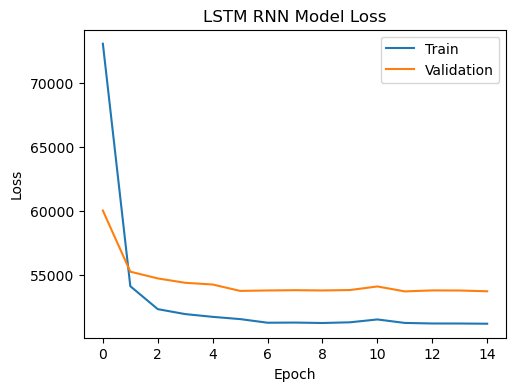

In [22]:
# Plot LSTM training and validation loss values 
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history["loss"])
plt.plot(history_lstm.history["val_loss"])
plt.title("LSTM RNN Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show();

ValueError: Cannot take the length of shape with unknown rank.

### Training the GRU RNN

In [29]:
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences = True, input_shape = (X_train_3D.shape[1], X_train_3D.shape[2])))
model_gru.add(GRU(50))
model_gru.add(Dense(1))

# Compile the model
model_gru.compile(loss = "mean_squared_error", optimizer = Adam(), metrics = ["mse"])

# Fit the model
history_gru = model_gru.fit(X_train_3D, y_train, epochs = 15, batch_size = 32, validation_split = 0.2)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 86310.6641 - mse: 86310.6641 - val_loss: 59994.0273 - val_mse: 59994.0273
Epoch 2/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 55483.3594 - mse: 55483.3594 - val_loss: 55558.1328 - val_mse: 55558.1328
Epoch 3/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 53331.0898 - mse: 53331.0898 - val_loss: 54743.6133 - val_mse: 54743.6133
Epoch 4/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 51465.0391 - mse: 51465.0391 - val_loss: 54454.9922 - val_mse: 54454.9922
Epoch 5/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 51070.0312 - mse: 51070.0312 - val_loss: 54360.2930 - val_mse: 54360.2930
Epoch 6/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 51750.7656 - mse: 51750.7656 - val_loss: 54258.8516 - val_mse: 54258.8516
Epoch 7/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 52147.0508 - mse: 52147.0508 - val_loss: 53934.1172 - val_mse: 53934.1172
Epoch 8/15
8048/8048 ━━━━━━━━━━━━━━━━━━━━

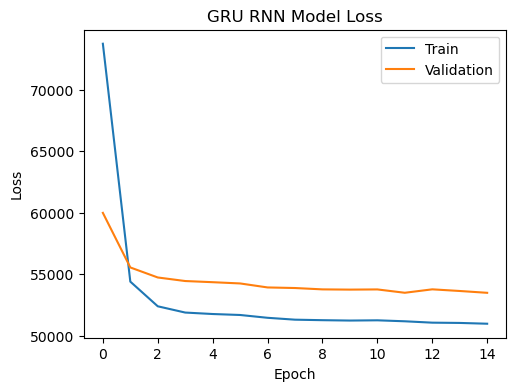

In [31]:
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history["loss"])
plt.plot(history_gru.history["val_loss"])
plt.title("GRU RNN Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show();
     